<a href="https://colab.research.google.com/github/Marpalli-Nikhitha-Sree/Secure_File_Sharing/blob/main/Secure_File_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pillow pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.0 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()     # choose an image like cover.png

Saving original.jpeg to original.jpeg


In [3]:
import os
print(os.listdir())

['.config', 'original.jpeg', 'sample_data']


In [6]:
from Crypto.Cipher import AES
from PIL import Image

# --- AES ENCRYPTION ---
def encrypt_message(message, key):
    cipher = AES.new(key.encode('utf-8'), AES.MODE_EAX)
    ciphertext, tag = cipher.encrypt_and_digest(message.encode('utf-8'))
    return cipher.nonce, ciphertext, tag

# --- STEGANOGRAPHY EMBEDDING ---
def hide_data_in_image(image_path, data, output_path):
    img = Image.open(image_path)
    binary_data = ''.join(format(byte, '08b') for byte in data)
    pixels = list(img.getdata())
    new_pixels = []
    data_index = 0

    for pixel in pixels:
        if data_index < len(binary_data):
            new_pixel = list(pixel)
            for i in range(3):  # modify R,G,B
                if data_index < len(binary_data):
                    new_pixel[i] = new_pixel[i] & ~1 | int(binary_data[data_index])
                    data_index += 1
            new_pixels.append(tuple(new_pixel))
        else:
            new_pixels.append(pixel)

    img.putdata(new_pixels)
    img.save(output_path)
    print("✅ Data hidden in image successfully:", output_path)

# --- RUN ---
key = "1234567890abcdef"    # 16 characters for AES
message = "This is a secret message."
nonce, ciphertext, tag = encrypt_message(message, key)

hide_data_in_image("original.jpeg", ciphertext, "stego.png")

✅ Data hidden in image successfully: stego.png


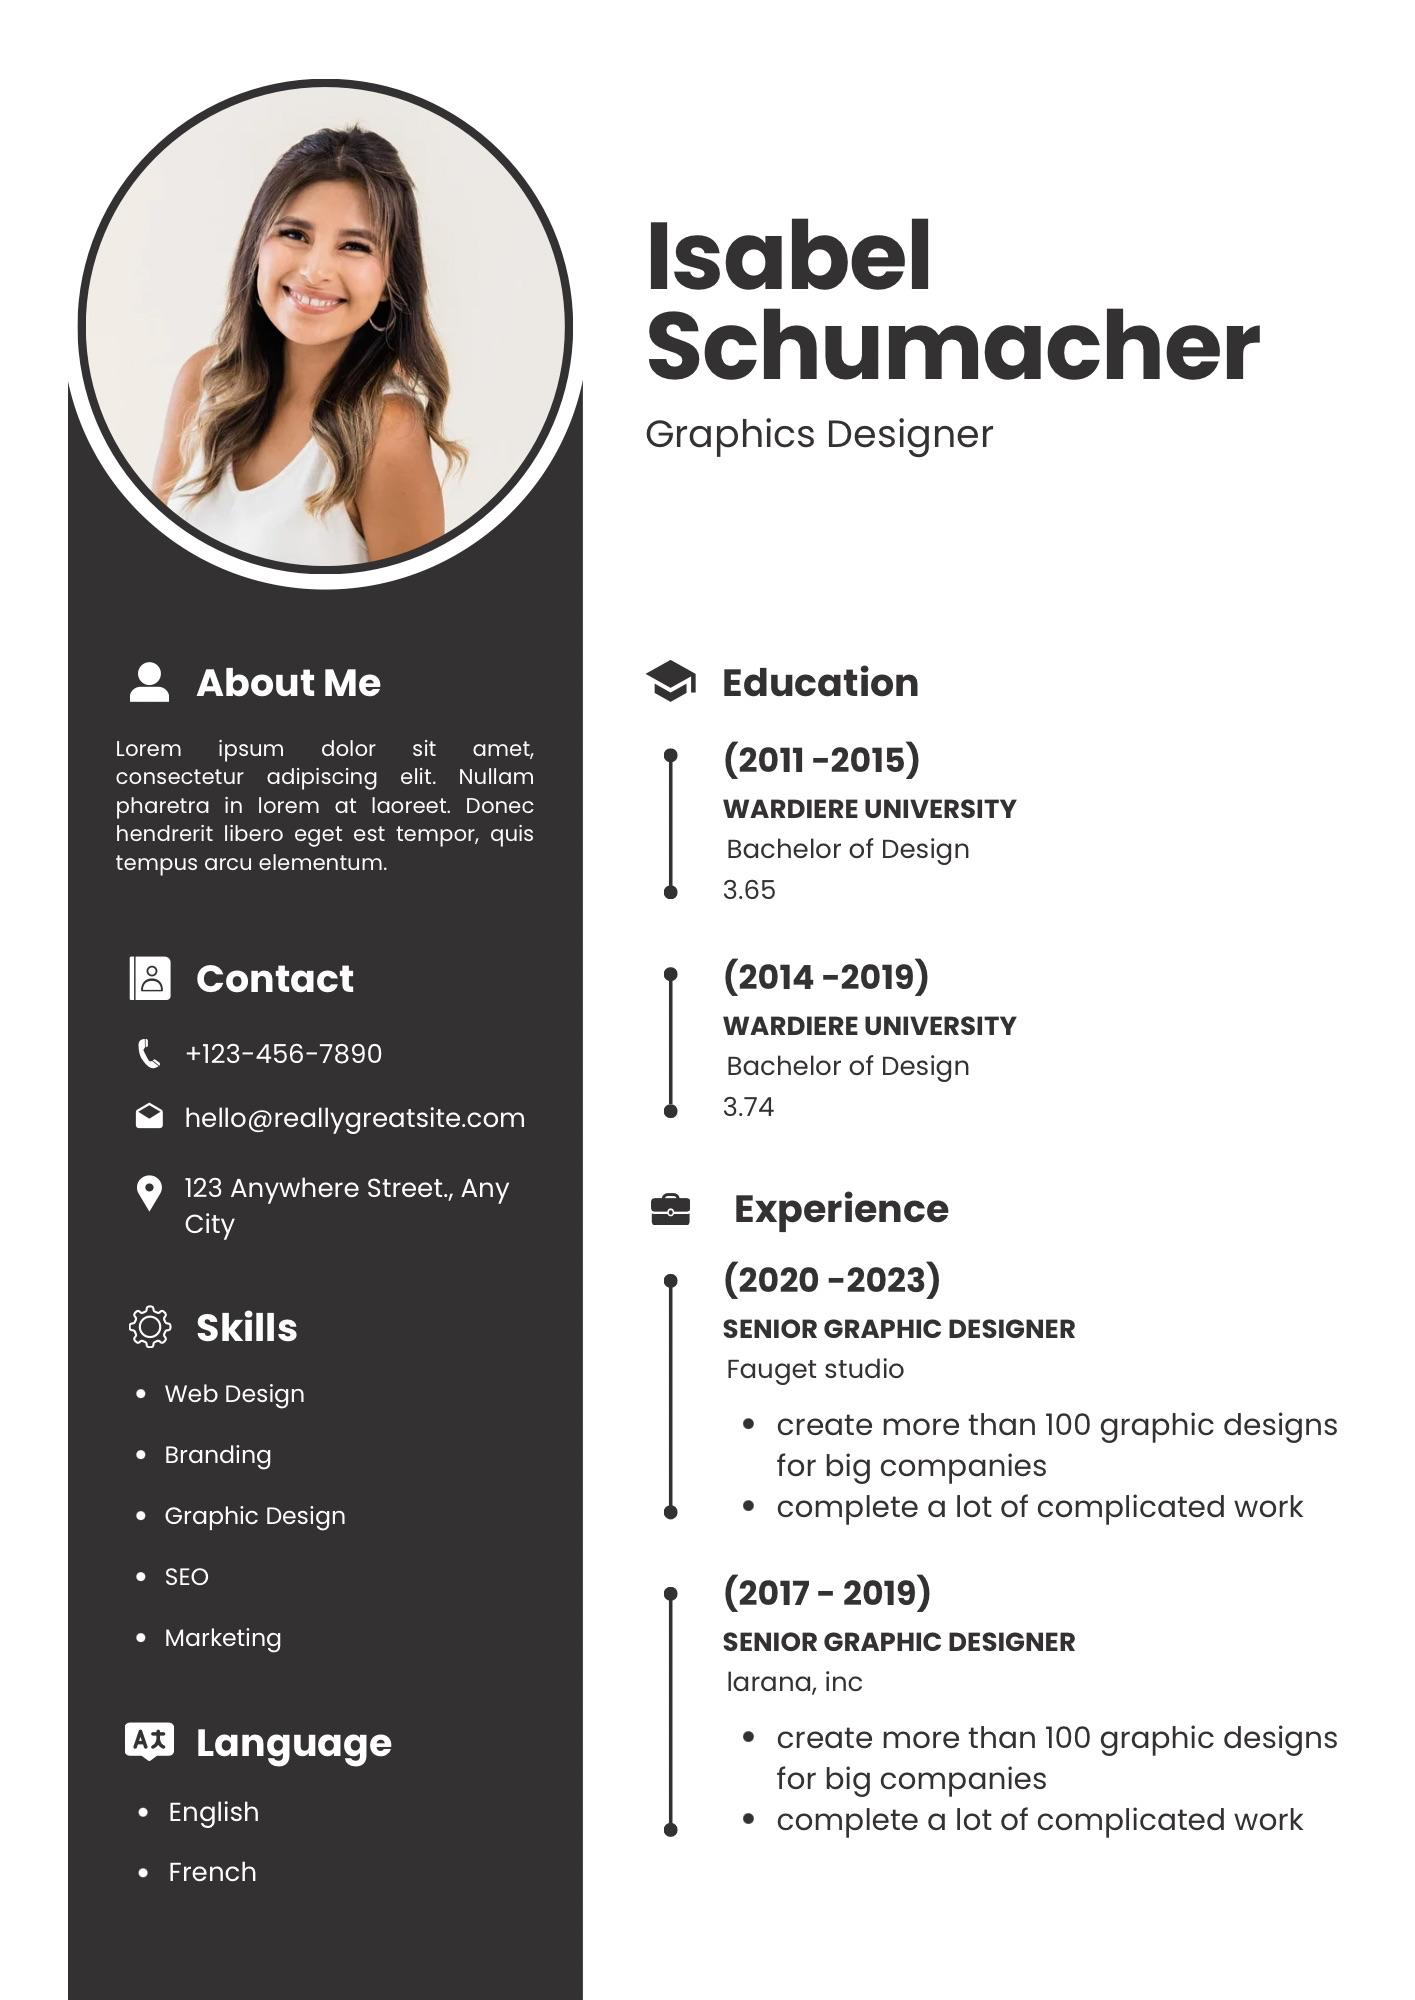

In [7]:
from IPython.display import Image as ShowImage
ShowImage("stego.png")          # Display image

In [8]:
# --- STEGANOGRAPHY EXTRACTION ---
def extract_data_from_image(image_path, length):
    img = Image.open(image_path)
    pixels = list(img.getdata())
    binary_data = ''
    for pixel in pixels:
        for i in range(3):
            binary_data += str(pixel[i] & 1)
            if len(binary_data) >= length * 8:
                break
        if len(binary_data) >= length * 8:
            break
    bytes_data = [int(binary_data[i:i+8], 2) for i in range(0, len(binary_data), 8)]
    return bytes(bytes_data)

# --- AES DECRYPTION ---
def decrypt_message(nonce, ciphertext, tag, key):
    cipher = AES.new(key.encode('utf-8'), AES.MODE_EAX, nonce=nonce)
    decrypted = cipher.decrypt_and_verify(ciphertext, tag)
    return decrypted.decode('utf-8')

# Extract and decrypt
# (You must use same key, nonce, and tag as sender)
extracted_cipher = extract_data_from_image("stego.png", len(ciphertext))
decrypted = decrypt_message(nonce, extracted_cipher, tag, key)
print("🔓 Decrypted Message:", decrypted)


🔓 Decrypted Message: This is a secret message.


In [9]:
print("🔐 Encrypted Ciphertext (in bytes):", ciphertext)
print("\n📏 Ciphertext Length:", len(ciphertext))

🔐 Encrypted Ciphertext (in bytes): b'\xdc\xb9\x82P\xf8\xf8\x10\xce\x92\xde\xd1j\xe7\x87rJ\xce\x93\x9aX\xd8\xd5\\\xe36'

📏 Ciphertext Length: 25


🖼️ Original Image:


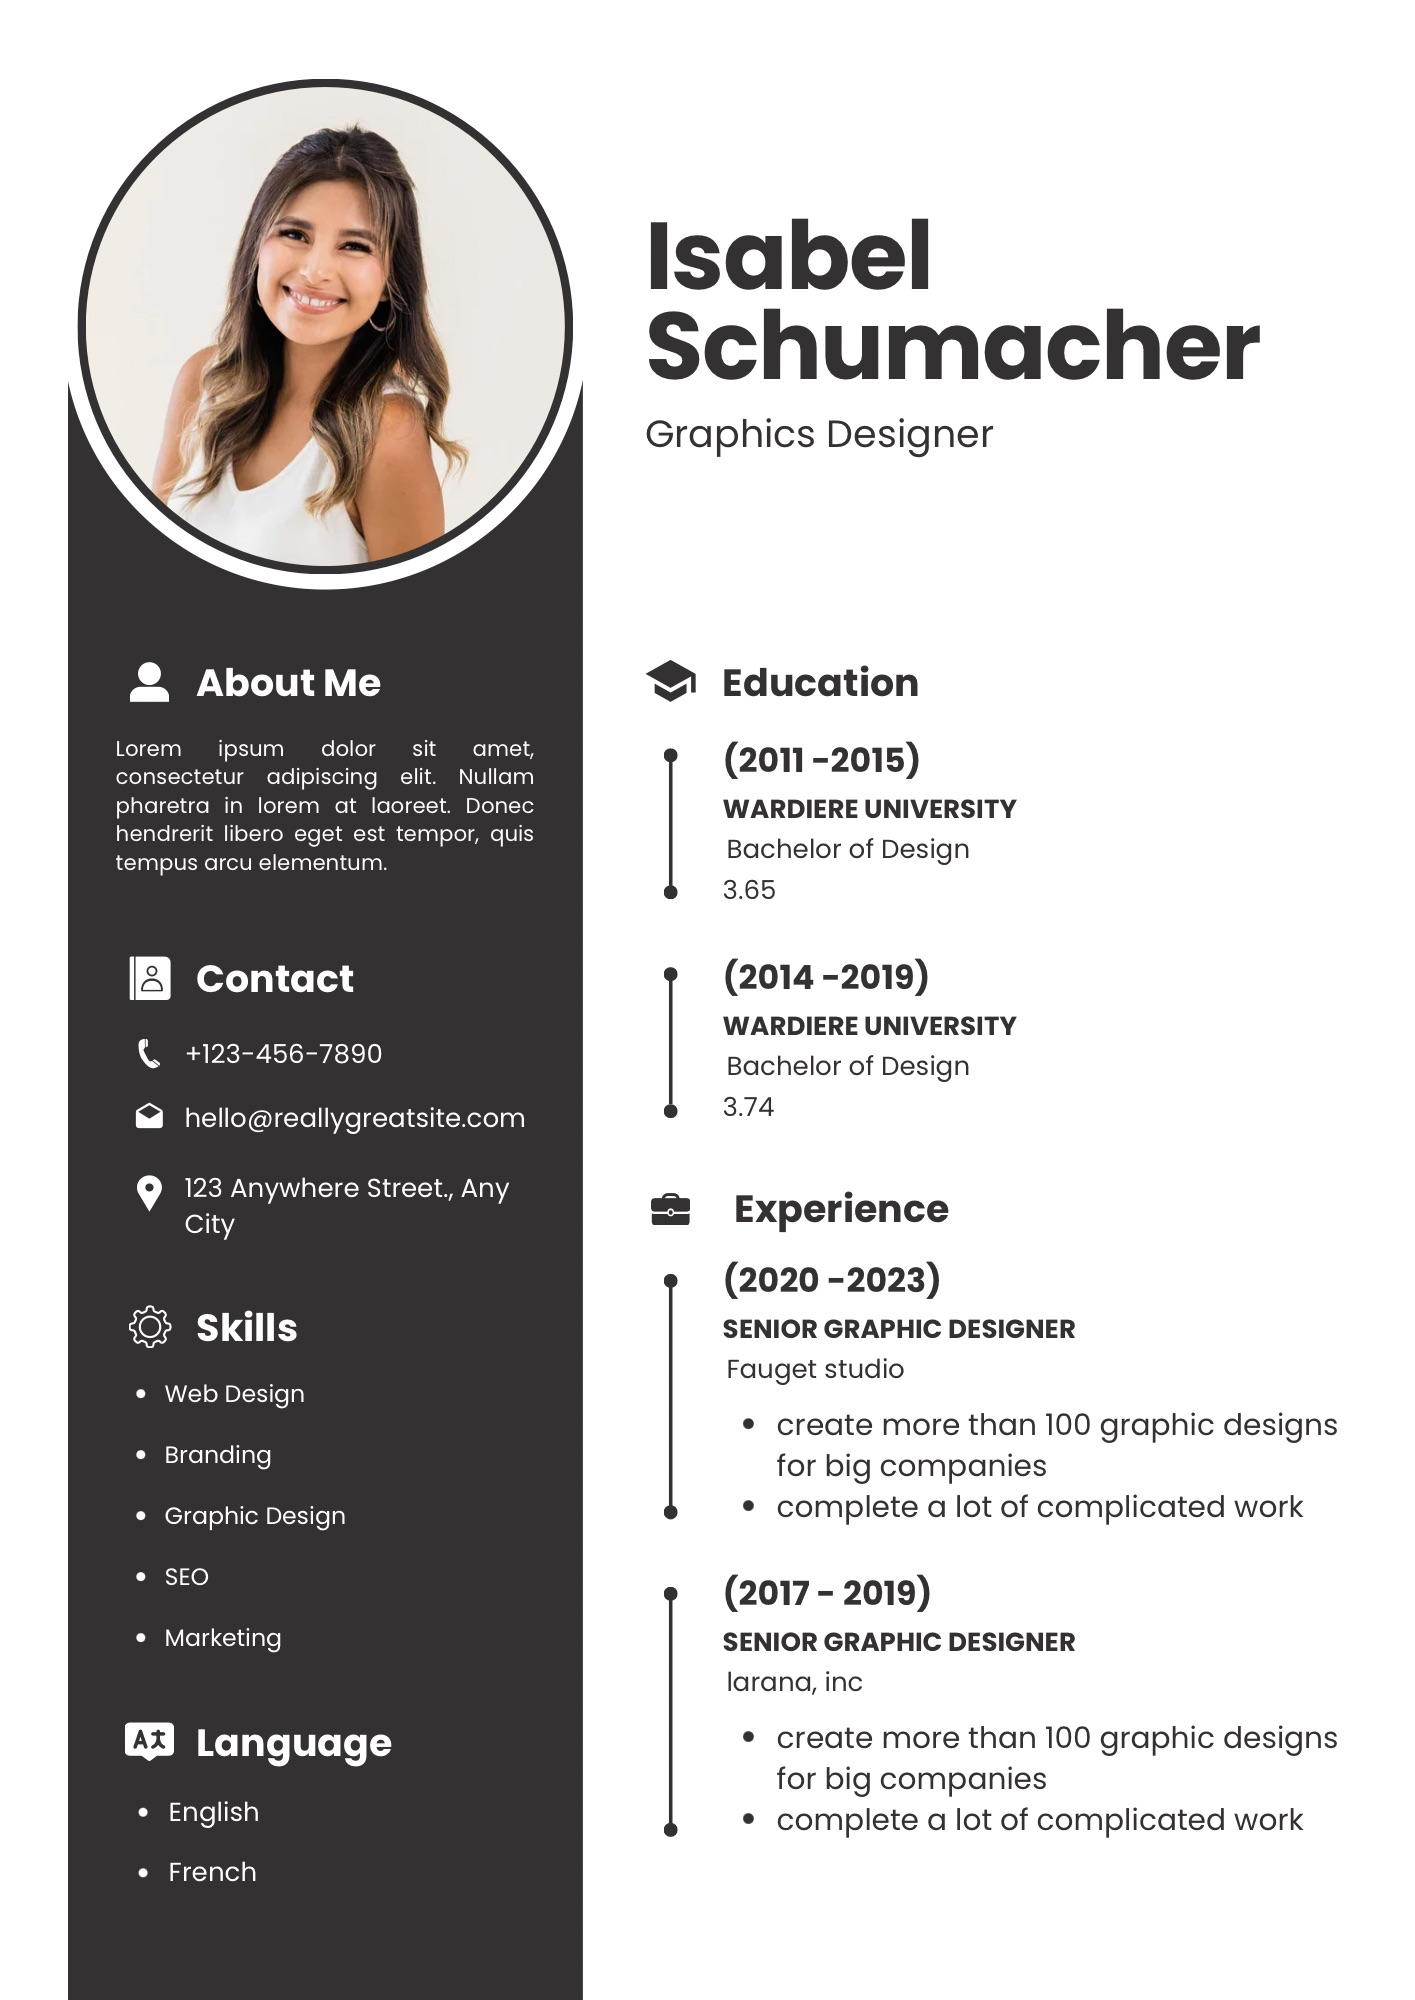

🕵️‍♀️ Stego Image (with hidden data):


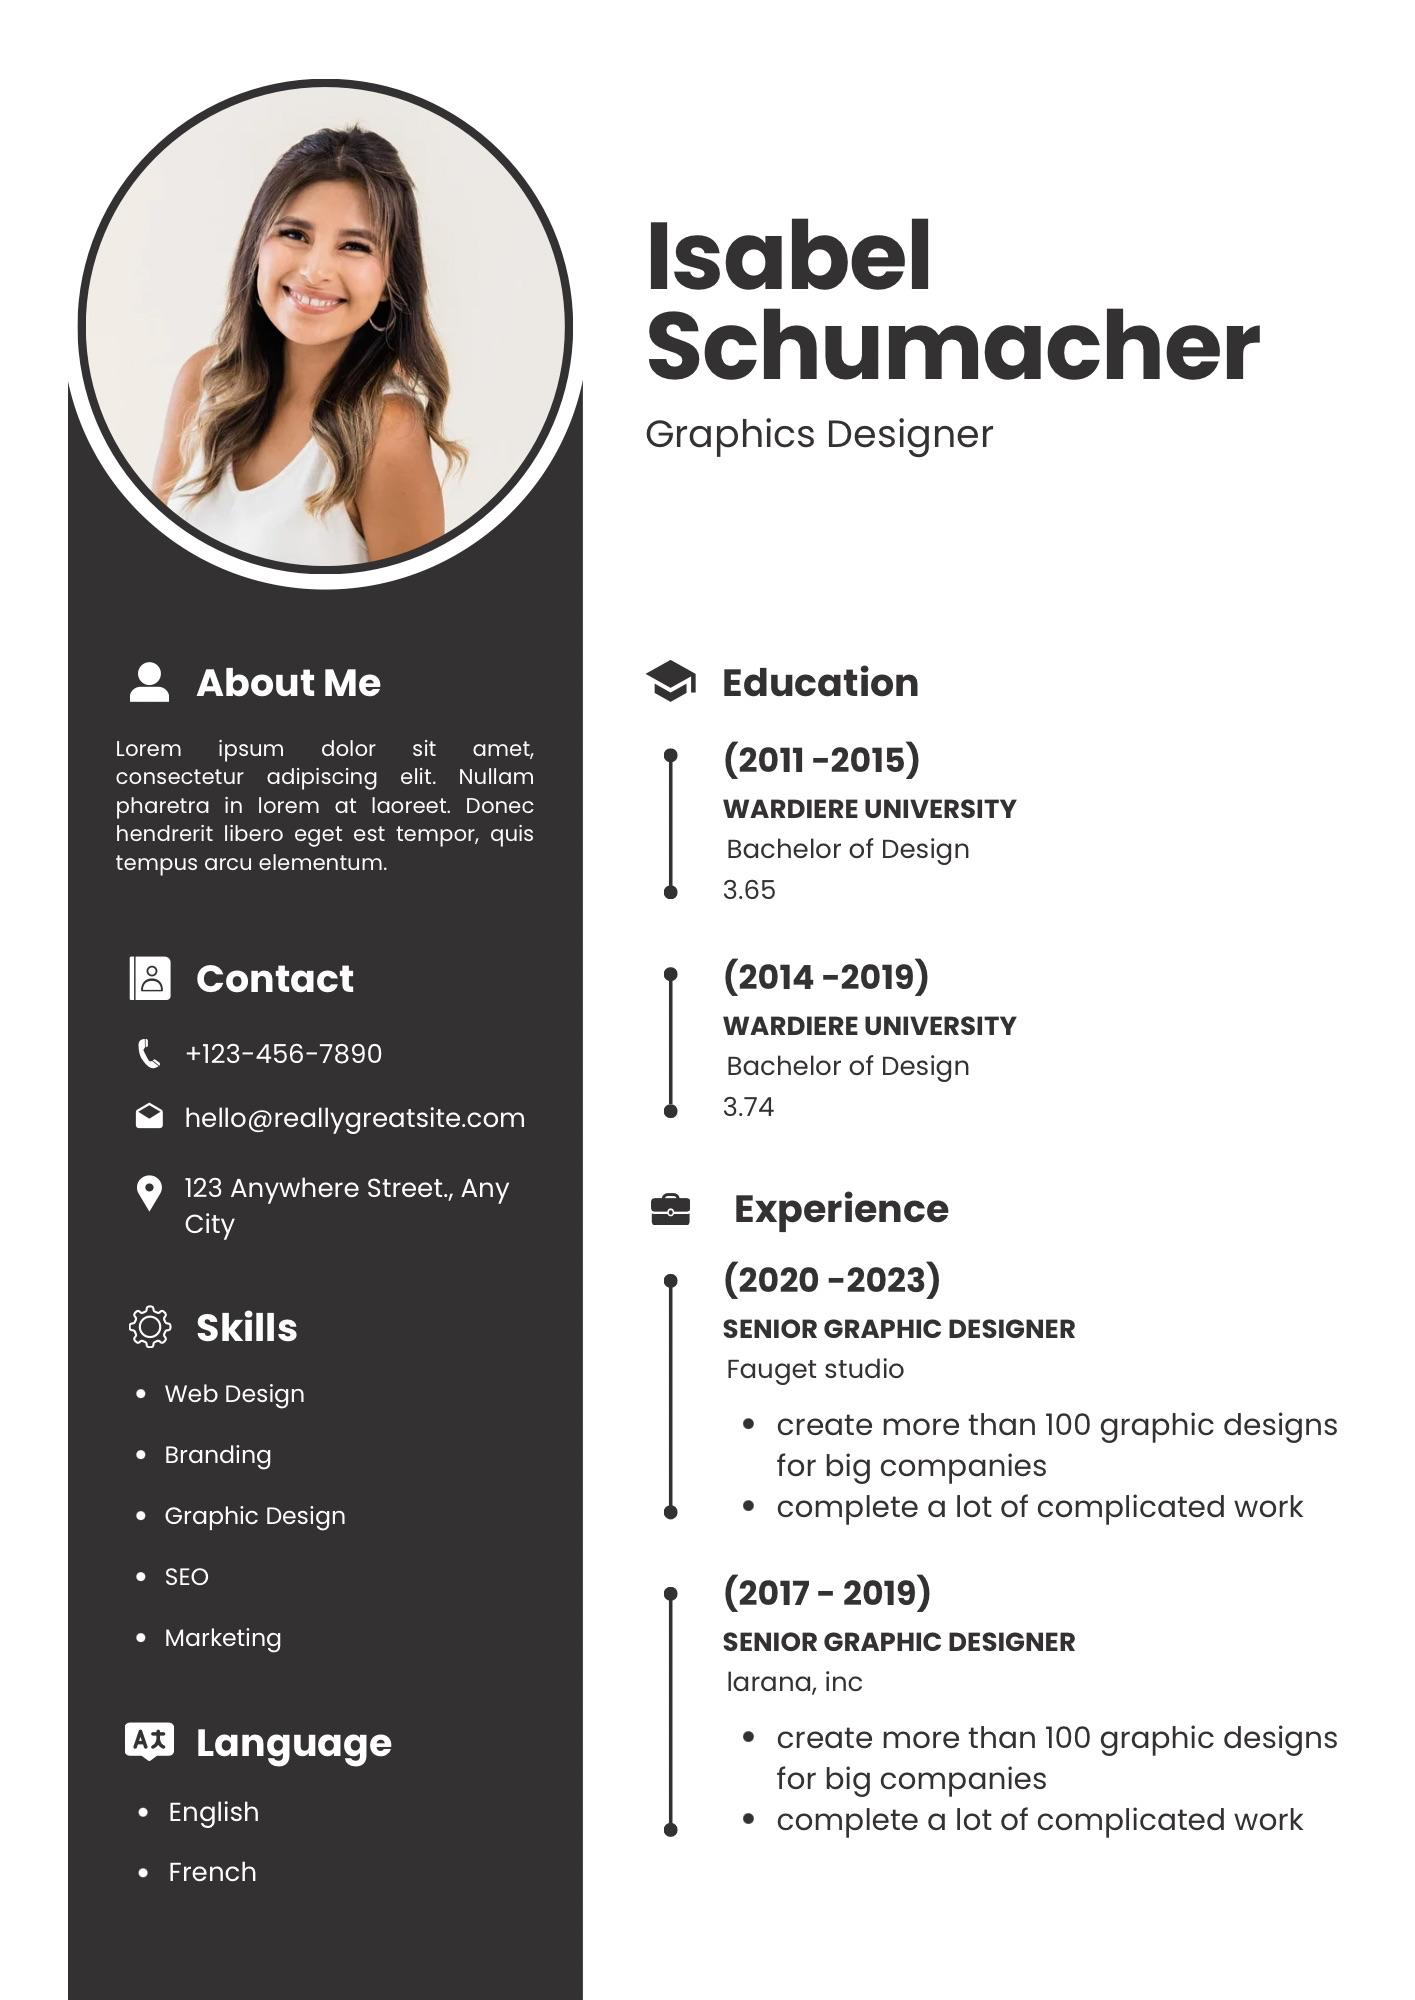

In [10]:
from IPython.display import Image as ShowImage, display

print("🖼️ Original Image:")
display(ShowImage("original.jpeg", width=200))

print("🕵️‍♀️ Stego Image (with hidden data):")
display(ShowImage("stego.png", width=200))

In [11]:
import numpy as np

def calculate_psnr(original_path, stego_path):
    img1 = np.array(Image.open(original_path).convert('RGB'))
    img2 = np.array(Image.open(stego_path).convert('RGB'))
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

psnr_value = calculate_psnr("original.jpeg", "stego.png")
print(f"📊 PSNR between Original and Stego Image: {psnr_value:.2f} dB")


📊 PSNR between Original and Stego Image: 97.51 dB


In [12]:
print("\n🔍 Extracting and Decrypting Message...")
decrypted = decrypt_message(nonce, extracted_cipher, tag, key)
print("\n✅ Final Decrypted Message:", decrypted)


🔍 Extracting and Decrypting Message...

✅ Final Decrypted Message: This is a secret message.
